# G2M Insight for Cab Investment firm

Purpose: 
As per growing Cab industry market, a private investment firm XYZ is seeking to invest on one of two Cab companies (Pink and Yellow).
The objective of the report is to provide G2M and the Cab industry insight to help the firm identify the right cab industry company to invest on.

Solution Summary:
Emphasized on the overall profit of each company and whether the payment type, city-wise visitors
rate, age, and income of customers affect the profit.

Hypothesis: 

1. Using the payment mode of 'Card' can have meaningful difference in profit. 
2. The cities with more overseas visitors would have higher cab usage. 
3. Users of higher income class would have higher cab usage.  

Assumptions:

1. Assumed net yearly profit is determined by the difference of charged price and cost of trip. 
2. Assumed the payment card type is Visa and the average processing fee is 2.4%. (taken from 
https://www.bankrate.com/finance/credit-cards/merchants-guide-to-credit-card-processing-fees/)
3. Neglected all NA values
4. \> 66th percentile (2/3rd) considered higher income group. 33rd - 66th percentile considered 
middle class group and \< 33rd percentile considered lower income group. 

Data of interests:

Time period of datasets: 31/01/2016 to 31/12/2018

- Cab_Data.csv : includes the transaction details for 2 cab companies
    - Total number of observations 359492, Total number of features 7, Size of the data 62.8 MB
- Customer_ID.csv : includes the customers’ demographic details
    -Total number of observations 49171, Total number of features 4, Size of the data 4.2 MB
- Transaction_ID.csv : contains transaction to customer mapping and payment mode
    -Total number of observations 440098, Total number of features 3, Size of the data 33.9 MB
- City.csv : list of US cities, their population and number of cab users
    -Total number of observations 20, Total number of features 3, Size of the data 4.2 KB
- Overseas.csv : includes the average number of overseas visitors in each city
    - Total number of observations 20, Total number of features 2, Size of the data 1.7 KB
    - Oversea.csv file is extracted from the information provided by 
https://www.bankrate.com/finance/credit-cards/merchants-guide-to-credit-card-processing-fees/

In [1]:
# importing data
import pandas as pd
import numpy as np
cab_data = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv')
city = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv')
customer_id = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv')
transaction_id = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv')

In [2]:
import xlrd
from datetime import datetime
date_object = []
for xl in cab_data['Date of Travel']:
  datetime_date = xlrd.xldate_as_datetime(xl, 0)
  date_object.append(datetime_date.date())

cab_data['Date of Travel'] = pd.to_datetime(date_object)

### User Data

In [3]:
# Gender distribution
trans_cust = pd.merge(transaction_id, customer_id, on='Customer ID')
cab_trans_cust = pd.merge(cab_data, trans_cust, on='Transaction ID')
cg = pd.DataFrame(cab_trans_cust.groupby(['Company', 'City', 'Gender'])['Transaction ID'].count()).reset_index()
city = cg[(cg['Company'] == 'Pink Cab') & (cg['Gender'] == 'Female')]['City'].tolist()
pcf = cg[(cg['Company'] == 'Pink Cab') & (cg['Gender'] == 'Female')]['Transaction ID'].tolist()
pcm = cg[(cg['Company'] == 'Pink Cab') & (cg['Gender'] == 'Male')]['Transaction ID'].tolist()
ycf =  cg[(cg['Company'] == 'Yellow Cab') & (cg['Gender'] == 'Female')]['Transaction ID'].tolist()
ycm =  cg[(cg['Company'] == 'Yellow Cab') & (cg['Gender'] == 'Male')]['Transaction ID'].tolist()

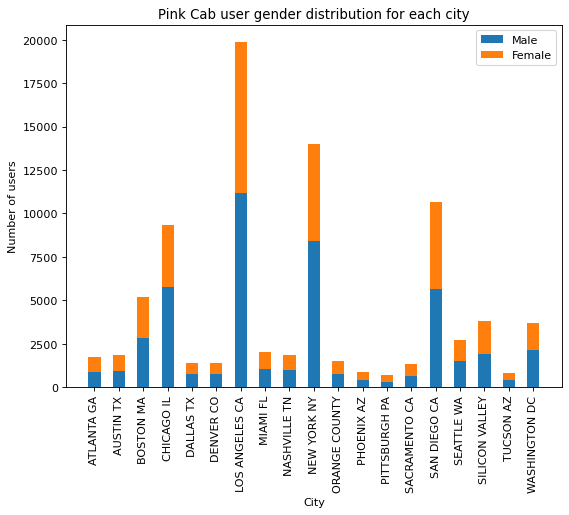

In [4]:
# Pink Cab
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
width = 0.5
plt.bar(city, pcm, width, label='Male')
plt.bar(city, pcf, width, bottom=pcm, label='Female')
plt.legend()
plt.xlabel('City')
plt.xticks(rotation='vertical')
plt.ylabel('Number of users')
plt.title('Pink Cab user gender distribution for each city')
plt.savefig('pinkgender.png')

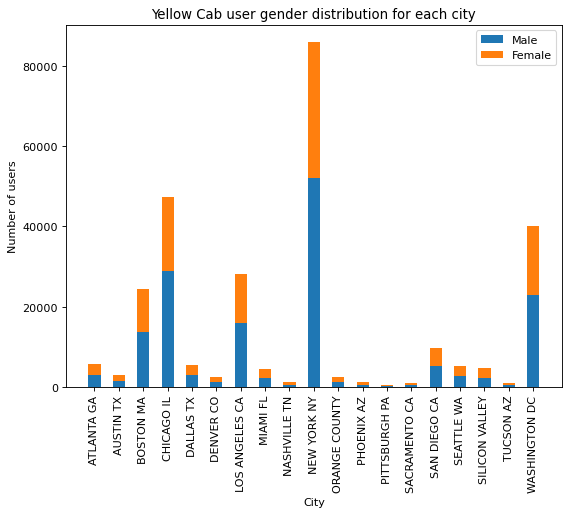

In [5]:
# Yellow Cab
figure(figsize=(8, 6), dpi=80)
width = 0.5
plt.bar(city, ycm, width, label='Male')
plt.bar(city, ycf, width, bottom=ycm, label='Female')
plt.legend()
plt.xlabel('City')
plt.xticks(rotation='vertical')
plt.ylabel('Number of users')
plt.title('Yellow Cab user gender distribution for each city')
plt.savefig('yellowgender.png')

For both companies, the number of male users are slightly greater than the number of female users in the city of major cab usage (Los Angeles, New York, Washington DC, Chicago, San Diego, etc.).

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
income class,,,,,,,,,,,,
high,10437612,2018-01-07,Pink Cab,WASHINGTON DC,28.50,369.04,310.65,53039,Card,Male,37,22765
low,10437610,2018-01-06,Pink Cab,WASHINGTON DC,13.56,184.19,135.60,51142,Card,Female,40,3122
middle,10437615,2018-01-05,Pink Cab,WASHINGTON DC,22.20,287.46,244.20,51996,Cash,Male,36,12905


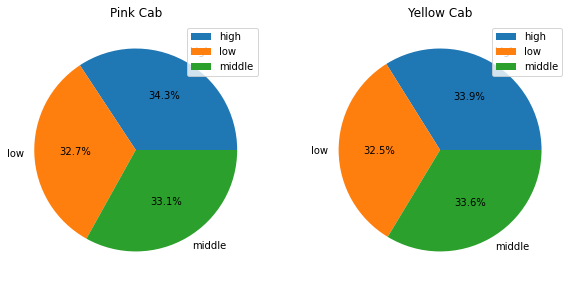

In [6]:
# User income
high = np.nanpercentile(customer_id['Income (USD/Month)'], 66)
middle = np.nanpercentile(customer_id['Income (USD/Month)'], 33)
cab_trans_cust["income class"] = cab_trans_cust['Income (USD/Month)']
cab_trans_cust["income class"] = np.where(cab_trans_cust['Income (USD/Month)'] >= high, "high", cab_trans_cust['income class'])
cab_trans_cust["income class"] = np.where((cab_trans_cust['Income (USD/Month)'] < high) & (cab_trans_cust['Income (USD/Month)'] >= middle), "middle", cab_trans_cust['income class'])
cab_trans_cust["income class"] = np.where(cab_trans_cust['Income (USD/Month)'] < middle, "low", cab_trans_cust['income class'])

#cab_trans_cust[cab_trans_cust['Company'] == 'Pink Cab'].groupby('income class')['Customer ID'].count().plot(kind ='pie', autopct='%1.0f%%')
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))

labels = ['high','low','middle']
values = cab_trans_cust[cab_trans_cust['Company'] == 'Pink Cab'].groupby('income class')['Customer ID'].count()
ax1.pie(values,labels = labels, autopct = '%1.1f%%') #plot first pie
ax1.set_title('Pink Cab')
ax1.legend()

values =  cab_trans_cust[cab_trans_cust['Company'] == 'Yellow Cab'].groupby('income class')['Customer ID'].count()
ax2.pie(values,labels = labels,autopct = '%1.1f%%') #plot second pie
ax2.set_title('Yellow Cab')
ax2.legend()
fig.savefig('incomedistrib.png')
# income group distribution 
cab_trans_cust[cab_trans_cust['Company'] == 'Pink Cab'].groupby('income class').last()

Both companies have similar distribution of users' income group. Categorized users with above 2/3 percentile of income as a 'High' income group. Users between 1/3 - 2/3 percentile of income as a 'Middle' income group and the users below 1/3 percentile to be 'Low' income group. 

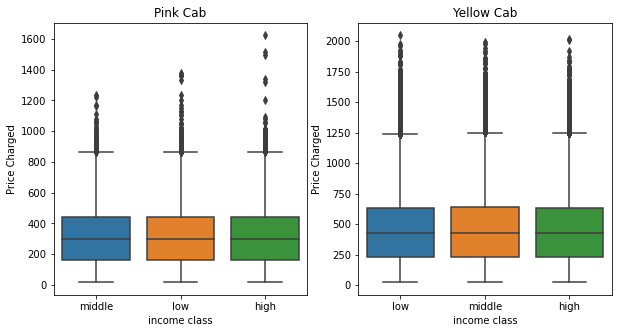

In [7]:
# price charged by income group 
import seaborn as sns
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
p_df = cab_trans_cust[cab_trans_cust['Company']=='Pink Cab']
y_df = cab_trans_cust[cab_trans_cust['Company']=='Yellow Cab']
sns.boxplot(ax=ax1, x=p_df["income class"], y=p_df["Price Charged"])
ax1.set_title('Pink Cab')
sns.boxplot(ax=ax2, x=y_df["income class"], y=y_df["Price Charged"])
ax2.set_title('Yellow Cab')
# Charged cab price by users' income class
fig.savefig('income_price.png')

For all income classes, the users using Yellow Cab paid higher, thus higher profit for the company. However, the average amount of price charged for all income classes is similar for both companies. This does not support the hypothesis 4: Users with higher 

In [8]:
# Yearly profit trend
# add column of profit margin
cab_data['Profit'] = cab_data['Price Charged'] - cab_data['Cost of Trip']
yearly_profit = pd.DataFrame(cab_data.groupby(['Company', cab_data['Date of Travel'].dt.year])['Profit'].mean())
yearly_profit = yearly_profit.reset_index()
pink = yearly_profit[yearly_profit.Company == 'Pink Cab']
yellow = yearly_profit[yearly_profit.Company == 'Yellow Cab']

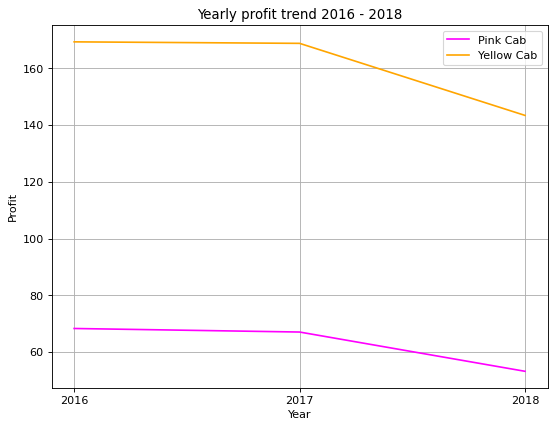

In [9]:
# yearly trend plot
figure(figsize=(8, 6), dpi=80)
x1 = pink['Date of Travel'].tolist()
p = pink['Profit'].tolist()
y = yellow['Profit'].tolist()

plt.plot(x1, p, label='Pink Cab', color='magenta')
plt.plot(x1, y, label='Yellow Cab', color='orange')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.title('Yearly profit trend 2016 - 2018')
plt.legend()
plt.xticks(x1, [2016, 2017, 2018])
plt.grid()
#plt.savefig('yearly_trend.png')

The yearly profit trend plot shows that the profit of 'Yellow Cab' is about 3 times greater than the profit of 'Pink Cab' over 2016 - 2018. 

In [10]:
# Average cost of trip per km travelled
cab_data['cost per km'] = cab_data['Cost of Trip'] / cab_data['KM Travelled']
cost = pd.DataFrame(cab_data.groupby(['Company', 'City'])['cost per km'].mean()).reset_index()
pink2 = cost[cost.Company == 'Pink Cab']['cost per km'].tolist()
yellow2 = cost[cost.Company == 'Yellow Cab']['cost per km'].tolist()

Mean of difference in cost of trip per km =  2.1978105243829607
Median =  2.2008004655561866


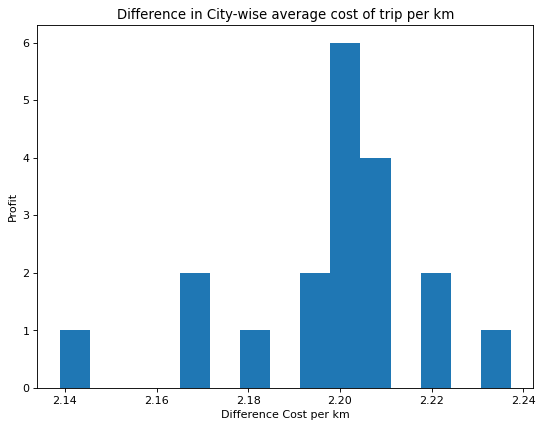

In [11]:
# Difference in cost of trip per km
figure(figsize=(8, 6), dpi=80)
plt.hist((pd.Series(yellow2) - pd.Series(pink2)).tolist(), bins=15)
plt.xlabel('Difference Cost per km')
plt.ylabel('Profit')
plt.title('Difference in City-wise average cost of trip per km')
#plt.savefig('diff')
print('Mean of difference in cost of trip per km = ',(pd.Series(yellow2) - pd.Series(pink2)).mean())
print('Median = ', (pd.Series(yellow2) - pd.Series(pink2)).median() )

To see whether the cost of trip of every km travelled plays significant role in determining the profit of the two cab companies, we take a histogram of the difference of cost/km of 'Yellow' and 'Pink'. The above histogram shows that the cost/km of 'Yellow' is greater than that of 'Pink' by about $2.2. This again validates that the profit of 'Yellow' is greater than the profit of 'Pink'.

### Hypothesis 1: More cash paid transactions will increase the overall profit.

To determine whether the transaction fee charged with card usage can impact the overall profit of the cab company. 

In [12]:
# Hypothesis 1
merged = pd.merge(cab_data, transaction_id, on=['Transaction ID'])[['Transaction ID','Customer ID', 'City', 'Price Charged', 'Company', 'Payment_Mode', 'Cost of Trip']]
p_mode = pd.DataFrame(merged.groupby(['Company', 'Payment_Mode'])['Transaction ID'].count()).reset_index()
card = p_mode[p_mode['Payment_Mode']=='Card']['Transaction ID'].tolist()
cash = p_mode[p_mode['Payment_Mode']=='Cash']['Transaction ID'].tolist()
comp = ['Pink Cab', 'Yellow Cab']


ratio of card and cash payment (Pink Cab) 1.4920863732642975
ratio of card and cash payment (Yellow Cab) 1.4994631287762976


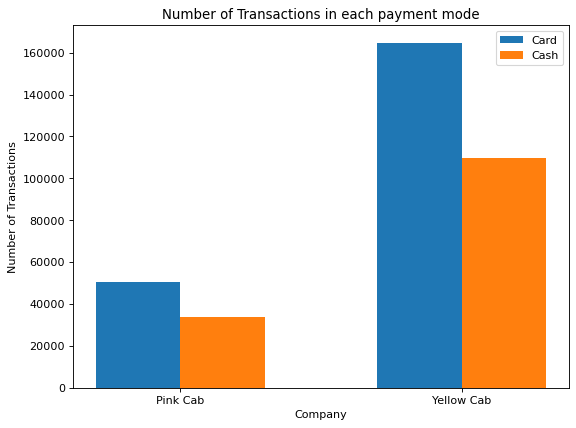

In [13]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=80)
X_axis = np.arange(len(comp))
plt.bar(X_axis - 0.15, card, 0.3, label = 'Card')
plt.bar(X_axis + 0.15, cash, 0.3, label = 'Cash')
plt.xticks(X_axis, comp)
plt.xlabel("Company")
plt.ylabel("Number of Transactions")
plt.title("Number of Transactions in each payment mode")
plt.legend()
#plt.savefig('payment_mode')
print('ratio of card and cash payment (Pink Cab)', card[0]/cash[0])
print('ratio of card and cash payment (Yellow Cab)', card[1]/cash[1])

In [14]:
card_p = merged[(merged['Payment_Mode'] == 'Card') & (merged['Company'] == 'Pink Cab')]
card_y = merged[(merged['Payment_Mode'] == 'Card') & (merged['Company'] == 'Yellow Cab')]
print('Estimated average profit considering card fee (Pink Cab) = ',((card_p['Price Charged']*0.973) - card_p['Cost of Trip']).mean())
print('Estimated average profit considering card fee (Yellow Cab) = ',((card_y['Price Charged']*0.973) - card_y['Cost of Trip']).mean())

Estimated average profit considering card fee (Pink Cab) =  54.30795430883903
Estimated average profit considering card fee (Yellow Cab) =  147.6146516642913


The ratios of Card and Cash payment mode for 'Pink Cab' and 'Yellow Cab' company are 1.492 and 1.499 respectively. Assuming the payment cards were Visa cards, the average processing fee ranges from 1.43% to 2.4% (from: https://www.bankrate.com/finance/credit-cards/merchants-guide-to-credit-card-processing-fees/). Assuming the processing fee is 2.4%, the estimated average profit of Yellow Cab is still about 2.7 times greater than Pink Cab. 


### Hypotheses 2: Cities with more overseas visitors would have higher cab usage

since the oversea visitors tend to use public transport, cabs, or rental cars for their transportation, the company with greater number of users in such cities with more overseas visitors would have higher profit. 

In [17]:
oversea = pd.read_csv('oversea.csv') # Based on information from https://www.bts.gov/archive/publications/state_transportation_statistics/summary/table_04_19
# correlation between weather and cab usage
bycity = pd.DataFrame(cab_data.groupby(['City'])['Transaction ID'].count()).reset_index()
bycity = bycity.rename(columns={'Transaction ID': 'num trans'})
bycity = pd.merge(bycity, oversea, on='City')[['num trans', 'Overseas']] # remove NaN

C:\Users\scho2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


correlation coefficient =  0.8387862760794225


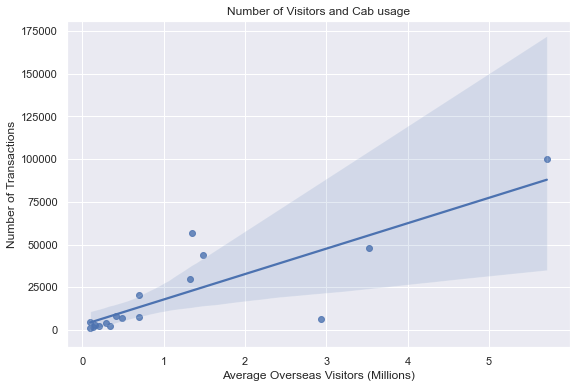

In [18]:
import seaborn as sns
x = bycity['Overseas'].tolist()
y = bycity['num trans'].tolist()
#create scatterplot with regression line and confidence interval lines
sns.set(rc = {'figure.figsize':(9,6)})
sns.regplot(x, y)
plt.xlabel('Average Overseas Visitors (Millions)')
plt.ylabel('Number of Transactions')
plt.title('Number of Visitors and Cab usage')
#plt.savefig('visitors.png')

print('correlation coefficient = ', pd.Series(x).corr(pd.Series(y)))

There is a linear correlation between the average overseas visitors in a city and the number of cab usages. The correlation coefficient between two features is around 0.84 which is high enough to support the claim. 

In [21]:
merged_cust = pd.merge(customer_id, merged, on='Customer ID', how='outer')
d = pd.DataFrame(merged_cust.groupby(['Company', 'City'])['Customer ID'].count()).reset_index()
d = d.rename(columns={'Customer ID':'num cust'})
pink3 = d[d['Company']=='Pink Cab']['num cust'].tolist()
yel3 = d[d['Company']=='Yellow Cab']['num cust'].tolist()
c = d[d['Company']=='Pink Cab']['City'].tolist()
merged_cust.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,City,Price Charged,Company,Payment_Mode,Cost of Trip
0,29290,Male,28,10813,10000011.0,ATLANTA GA,370.95,Pink Cab,Card,313.6350
1,29290,Male,28,10813,10351127.0,ATLANTA GA,598.70,Yellow Cab,Cash,317.4228
2,29290,Male,28,10813,10412921.0,ATLANTA GA,792.05,Yellow Cab,Card,597.4020
3,27703,Male,27,9237,10000012.0,ATLANTA GA,358.52,Pink Cab,Card,334.8540
4,27703,Male,27,9237,10320494.0,ATLANTA GA,721.10,Yellow Cab,Card,467.1192


Cities with the highest number of Overseas visitors ['NEW YORK NY', 'LOS ANGELES CA']


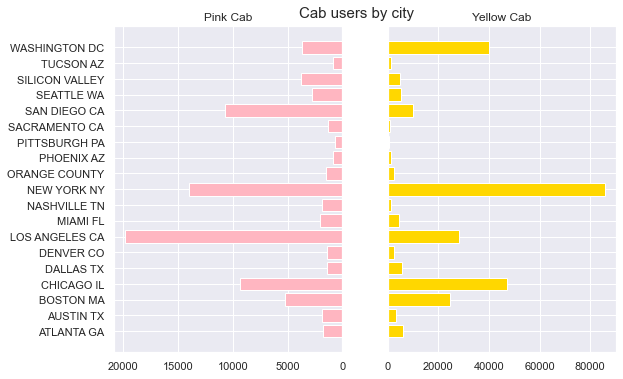

In [20]:
y = range(0, len(c))
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))
plt.figtext(.5,.9,"Cab users by city", fontsize=15, ha='center')
axes[0].barh(y, pink3, align='center', color='lightpink')
axes[0].set(title='Pink Cab')
axes[1].barh(y, yel3, align='center', color='gold')
axes[1].set(title='Yellow Cab')
axes[0].set(yticks=y, yticklabels=c)
axes[0].invert_xaxis()
#plt.savefig('popcit')
most = np.nanpercentile(oversea['Overseas'], 90)
visitor_city = oversea[oversea['Overseas'] >= most]['City'].tolist()
print('Cities with the highest number of Overseas visitors', visitor_city)

Overall, the number of Yellow Cab users outweigh the number of Pink Cab users in most of the cities (dropping NA). Los Angeles and New York has the highest number of visitors (90th percentile) and for both cities, there are more Yellow Cab users. Relating to the correlation plot above, sine Yellow Cab has more users in such cities with higher number of overseas visitors, there would be higher Yellow cab usage. 


Yellow cab company overall had higher yearly profit. Even considering the card processing fees, the company earned about 2.7 times the profit of the Pink Cab company. Also, the cost per km of Yellow Cab was about $2.2 higher than the cost per km of Pink Cab and still maintained higher profit. 

The Yellow Cab again has dominated the number of cab users with the most number of overseas visitors where the number of overseas visitors is positively related to the number of transactions. 

Considering all these results, Yellow Cab company seems to be more demanding. Therefore, we recommend investigating on Yellow Cab company. 
